In [1]:
from tradingSimulator import TradingSimulator
simulator = TradingSimulator()

In [2]:
TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2019-01-01',
    'splitingDate': '2017-01-01',
    
    # Variables specifying the default capital at the disposal of the trader
    'money': 100000,

    # Parameters related to the DQN algorithm
    'numberOfEpisodes': 50,
    'gamma': 0.4,
    'learningRate': 0.0001,
    'targetNetworkUpdate': 1000,
    'learningUpdatePeriod': 1,

    # Parameters related to the Experience Replay mechanism
    'capacity': 100000,
    'batchSize': 32,
    'experiencesRequired': 1000,

    # Parameters related to the Epsilon-Greedy exploration technique
    'epsilonStart': 1.0,
    'epsilonEnd': 0.01,
    'epsilonDecay': 10000
}

TESTING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2021-01-01',
    'splitingDate': '2019-01-01',
    
    # Variables specifying the default capital at the disposal of the trader
    'money': 100000
}




Analysis of the entire time series (both training and testing phases)
---------------------------------------------------------------------



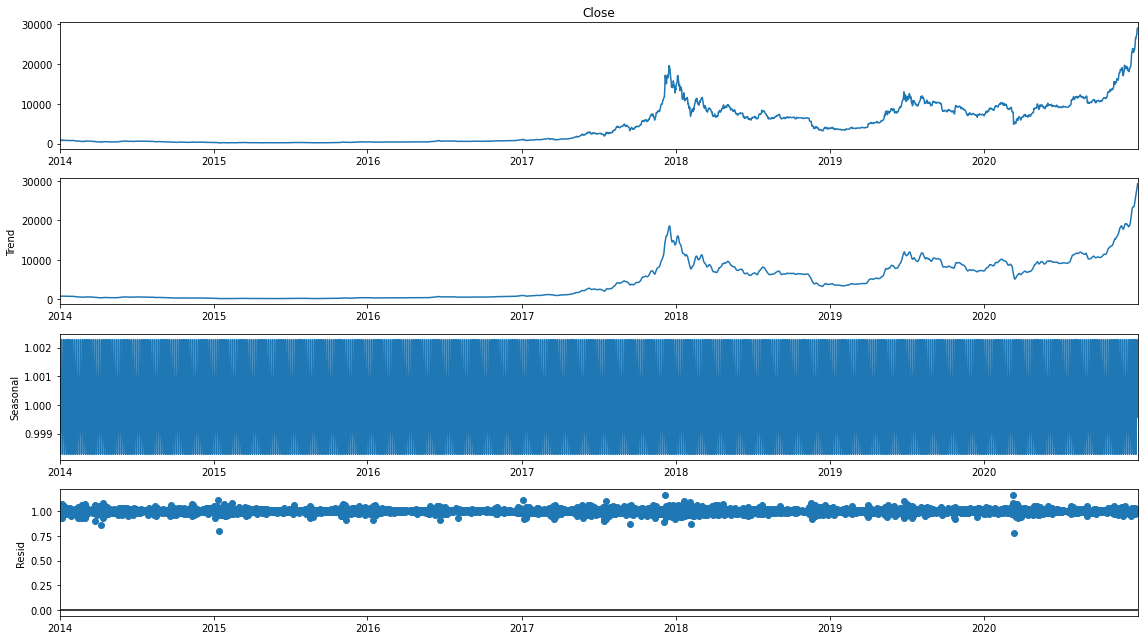

Stationarity analysis: Augmented Dickey-Fuller test (ADF):
ADF statistic: 1.6121807625965974
p-value: 0.9978936629978012
Critial values (the time series is not stationary with X% condifidence):
1%: -3.432938355012086
5%: -2.8626835272597217
10%: -2.567378742868999
The ADF test could not affirm whether or not the time series is stationary...


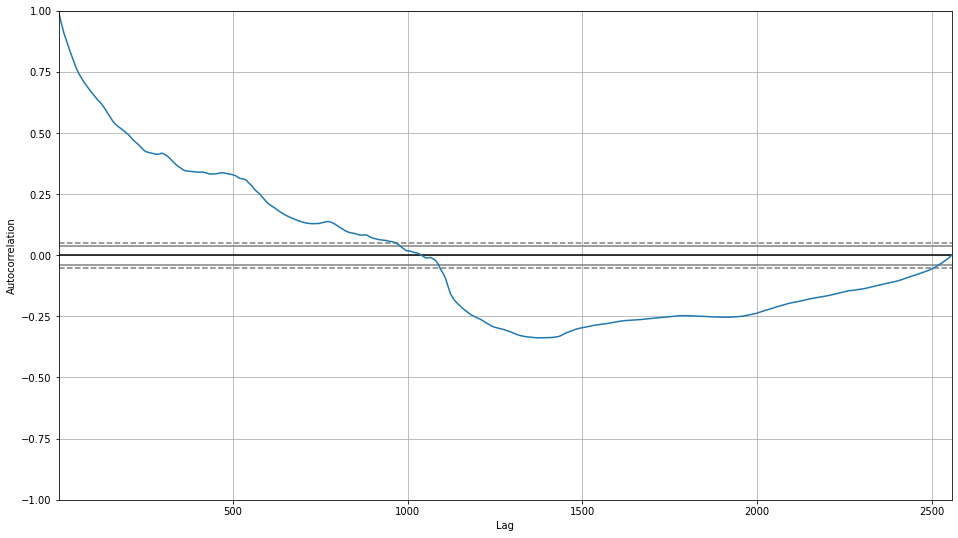

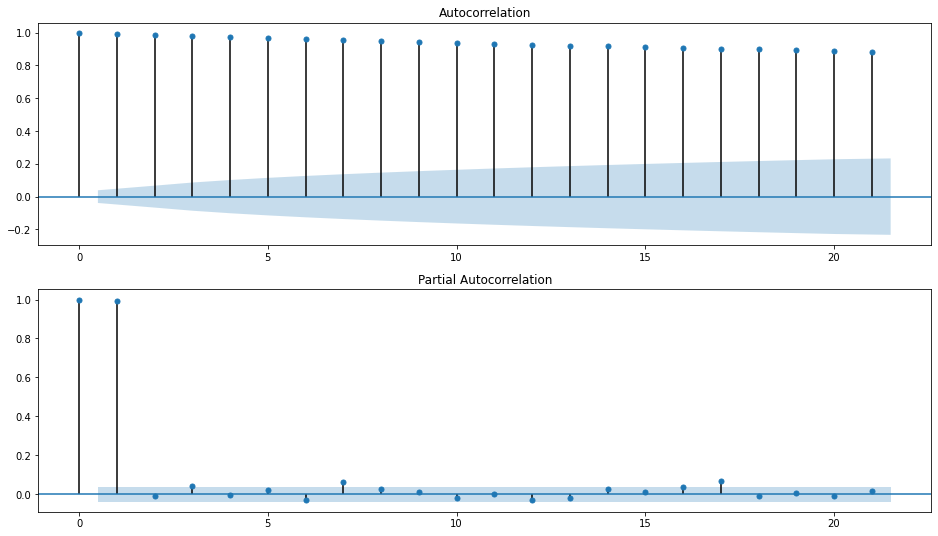

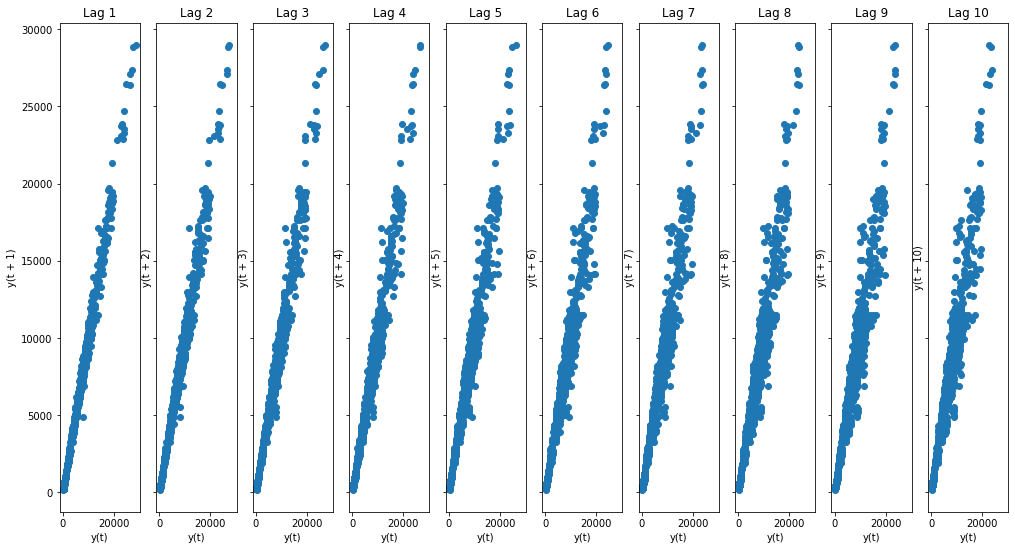

In [3]:
cryptocurrency = "Bitcoin"
simulator.analyseTimeSeries(cryptocurrency, '2014-01-01', '2021-01-01')

  0%|          | 0/50 [00:00<?, ?it/s]

Training progression (hardware selected => cpu):


100%|██████████| 50/50 [1:15:36<00:00, 90.73s/it] 


╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │ 11569599 │
├───────────────────────────┼──────────┤
│     Annualized Return     │  84.32%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  48.17%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  2.512   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  4.143   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  18.42%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 25 days  │
├───────────────────────────┼──────────┤
│       Profitability       │  68.42%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  3.384   │
├───────────────────────────┼──────────┤
│         Skewness          │  1.148   │
╘═══════════════════════════╧══════════╛
╒═══════════════════════════╤═════════╕
│   Performance I

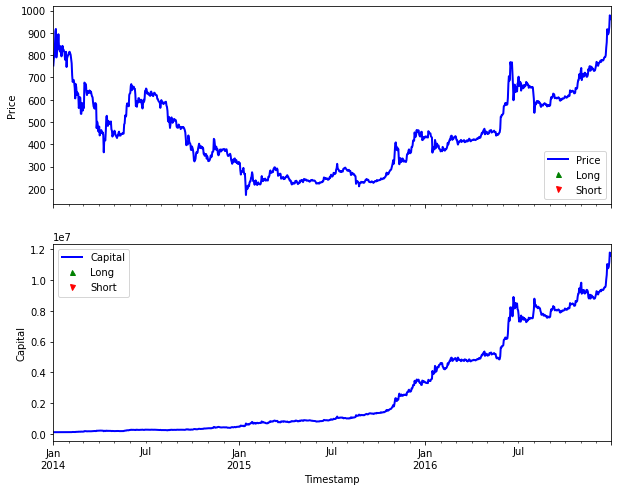

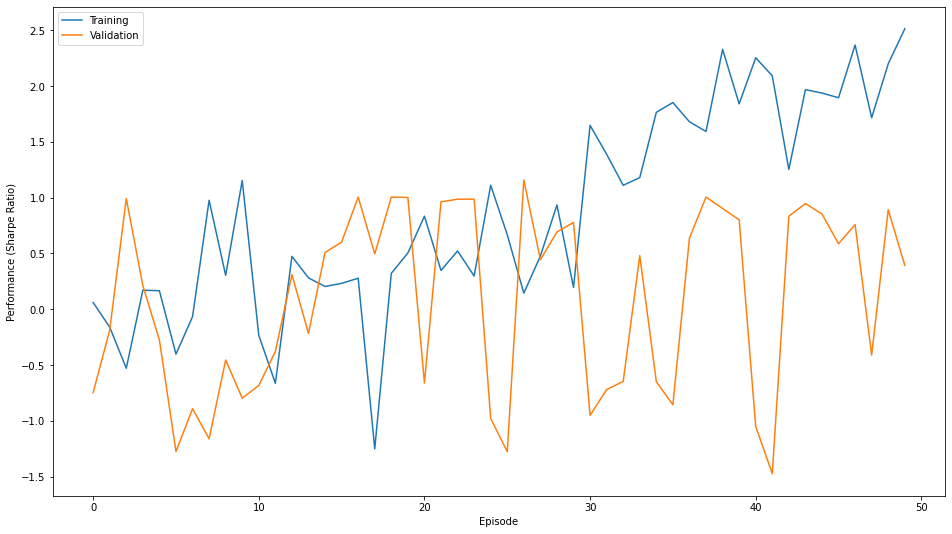

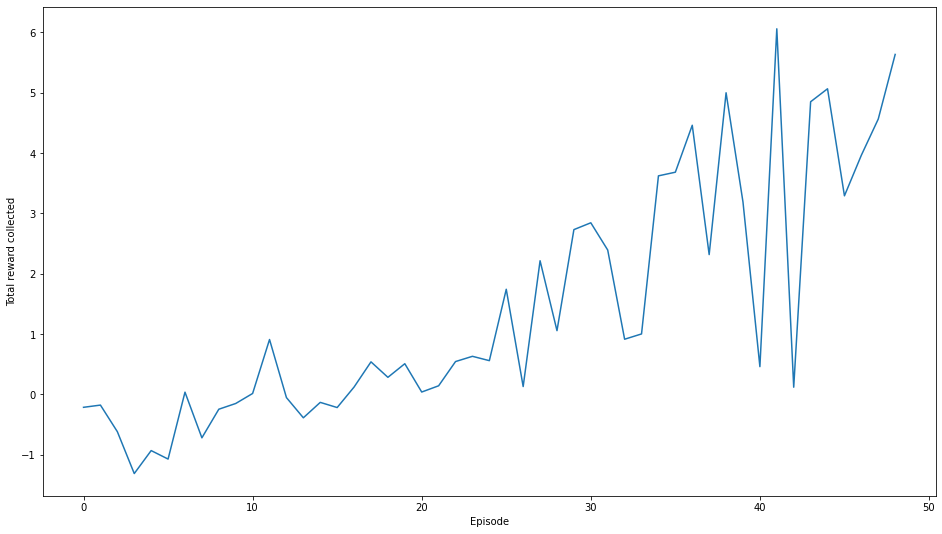

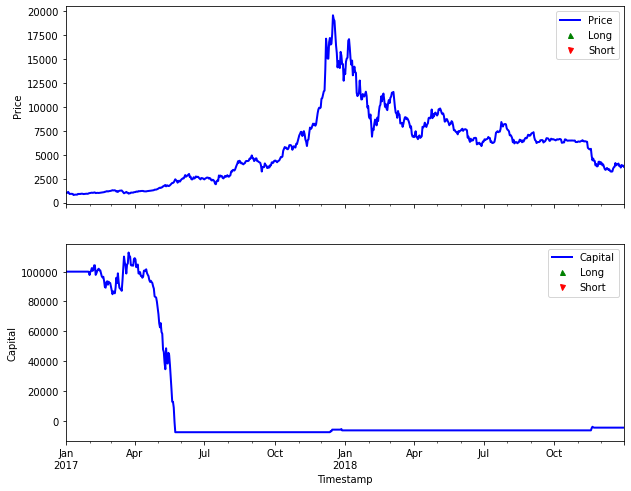

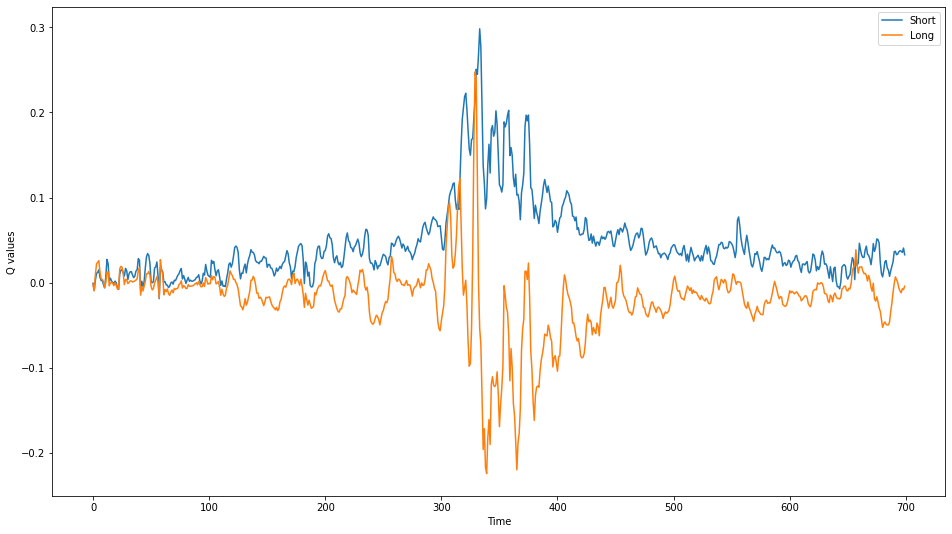

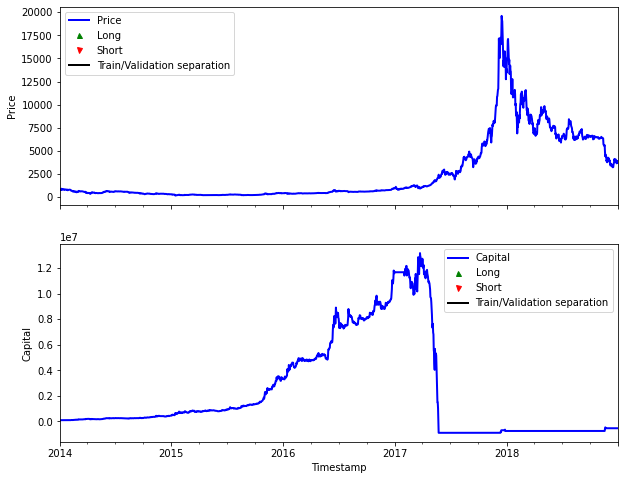

In [4]:
# strategy in {
#     'Buy and Hold',
#     'Sell and Hold',
#     'Trend Following Moving Averages',
#     'Mean Reversion Moving Averages',
#     'TDQN'
# }

# cryptocurrency in {'Bitcoin'}

strategy = "TDQN"
cryptocurrency = "Bitcoin"
simulator.trainAndValidate(strategy, cryptocurrency, TRAINING_PARAM)
print()

╒═══════════════════════════╤═════════╕
│   Performance Indicator   │  TDQN   │
╞═══════════════════════════╪═════════╡
│    Profit & Loss (P&L)    │ 1977662 │
├───────────────────────────┼─────────┤
│     Annualized Return     │ 39.36%  │
├───────────────────────────┼─────────┤
│   Annualized Volatility   │ 58.27%  │
├───────────────────────────┼─────────┤
│       Sharpe Ratio        │  1.008  │
├───────────────────────────┼─────────┤
│       Sortino Ratio       │  1.394  │
├───────────────────────────┼─────────┤
│     Maximum Drawdown      │ 47.72%  │
├───────────────────────────┼─────────┤
│ Maximum Drawdown Duration │ 77 days │
├───────────────────────────┼─────────┤
│       Profitability       │ 52.08%  │
├───────────────────────────┼─────────┤
│ Ratio Average Profit/Loss │  1.499  │
├───────────────────────────┼─────────┤
│         Skewness          │  0.417  │
╘═══════════════════════════╧═════════╛
╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   

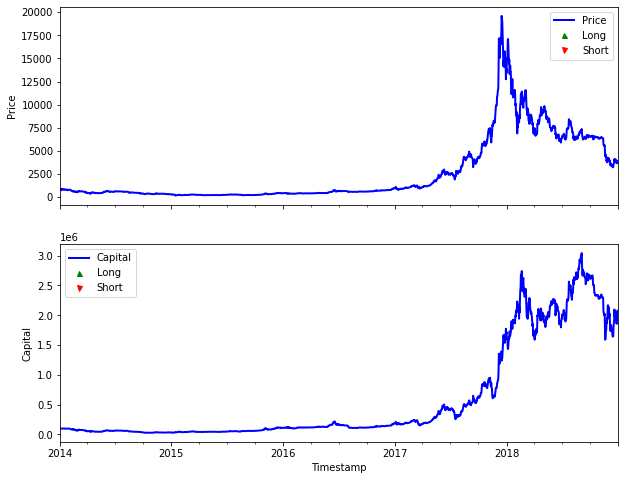

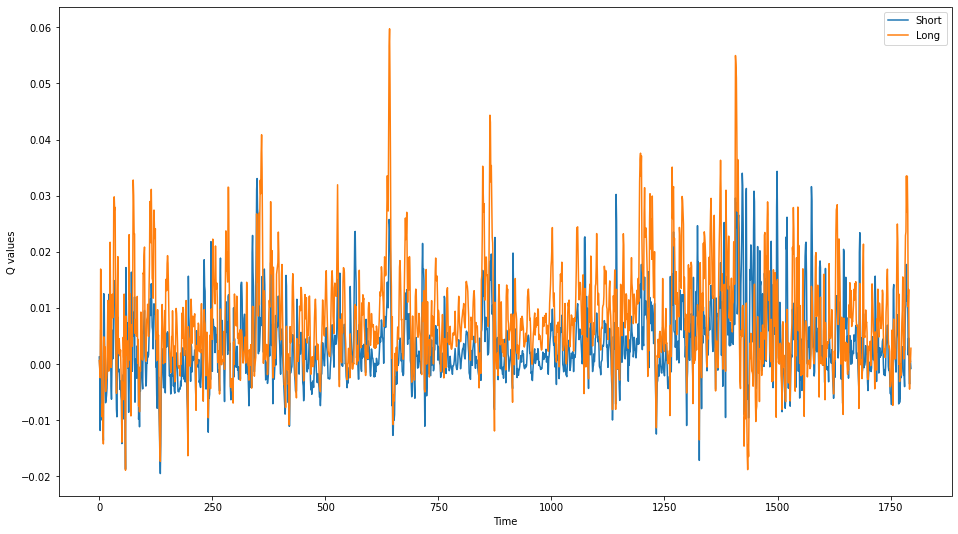

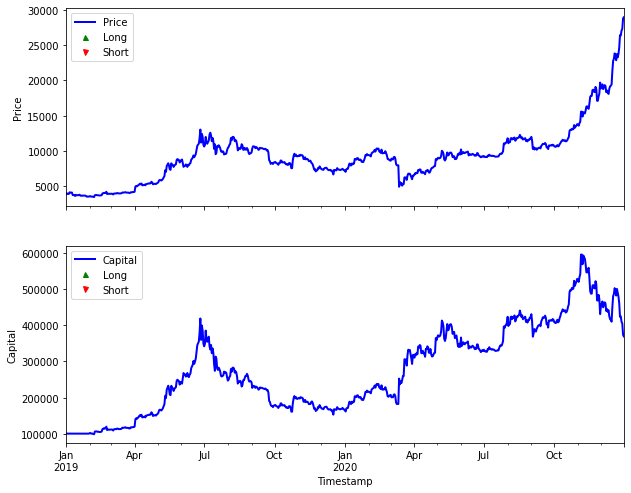

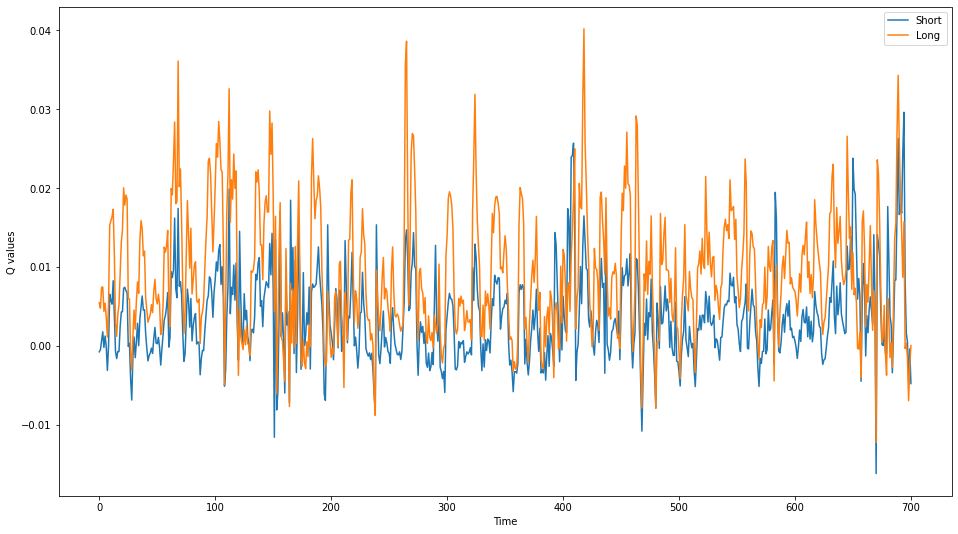

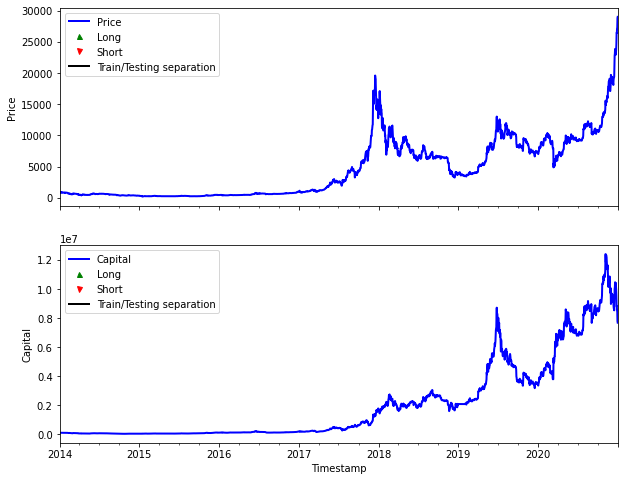

In [5]:
simulator.test(strategy, cryptocurrency, TESTING_PARAM)
print()

No training is required as the simple Buy and Hold trading strategy does not involve any tunable parameters.
No training results are available as the simple Buy and Hold trading strategy does not involve any tunable parameters.
╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   B&H    │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  20329   │
├───────────────────────────┼──────────┤
│     Annualized Return     │  21.47%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  52.63%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.346   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  0.427   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  78.61%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 346 days │
├───────────────────────────┼──────────┤
│       Profitability       │ 100.00%  │
├───────────────────────────┼─────

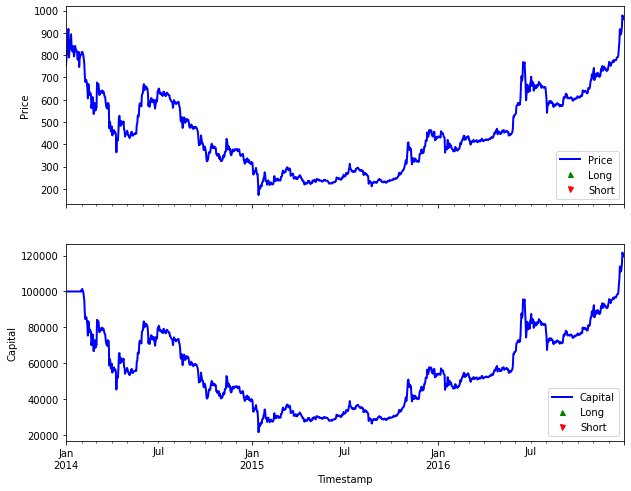

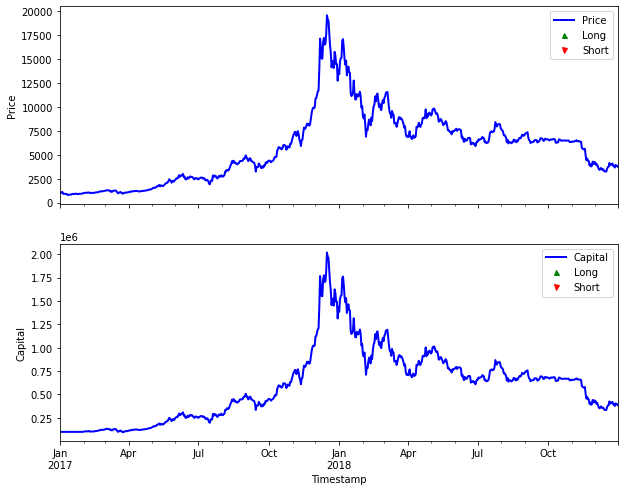

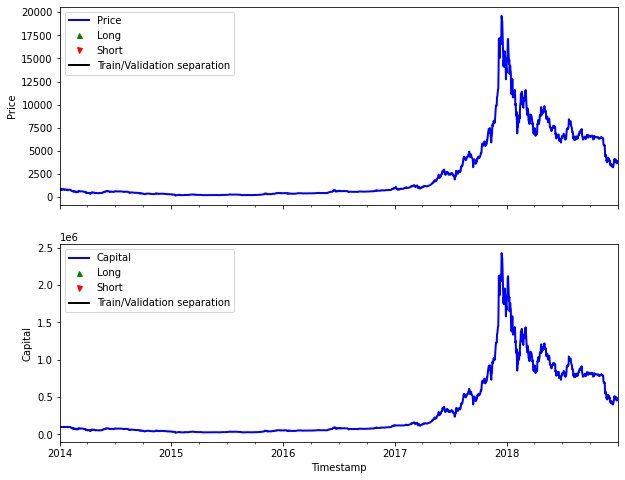

In [6]:
strategy = "Buy and Hold"
cryptocurrency = "Bitcoin"
simulator.trainAndValidate(strategy, cryptocurrency, TRAINING_PARAM)
print()

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   B&H    │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  364249  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  31.41%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  61.81%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.652   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  0.855   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  83.46%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 364 days │
├───────────────────────────┼──────────┤
│       Profitability       │ 100.00%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │   inf    │
├───────────────────────────┼──────────┤
│         Skewness          │  0.168   │
╘═══════════════════════════╧══════════╛
╒═══════════════════════════╤══════════╕
│   Performance 

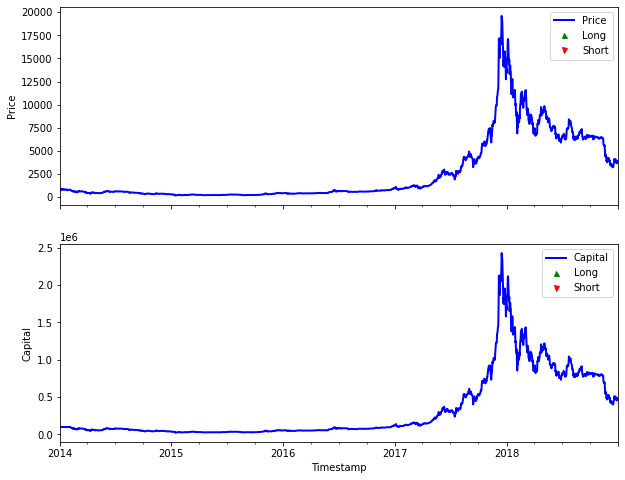

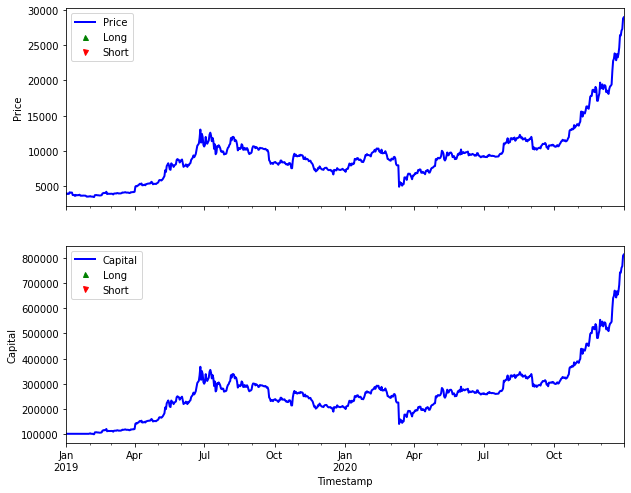

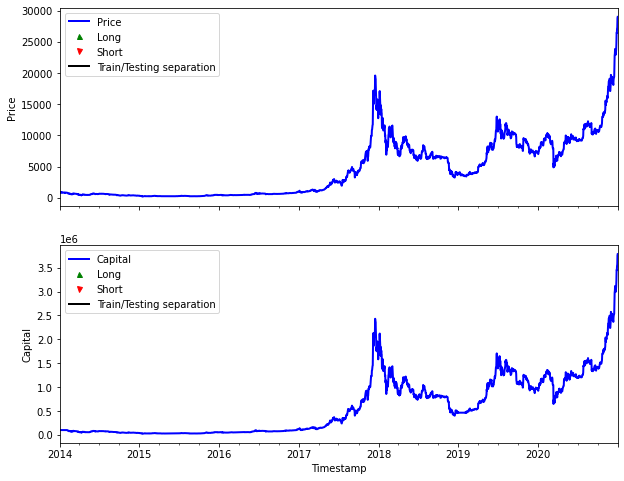

In [7]:
simulator.test(strategy, cryptocurrency, TESTING_PARAM)
print()

No training is required as the simple Sell and Hold trading strategy does not involve any tunable parameters.
No training results are available as the simple Sell and Hold trading strategy does not involve any tunable parameters.
╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   S&H    │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  -20528  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  -4.02%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  22.88%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  -0.116  │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  -0.143  │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  56.14%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 714 days │
├───────────────────────────┼──────────┤
│       Profitability       │  0.00%   │
├───────────────────────────┼───

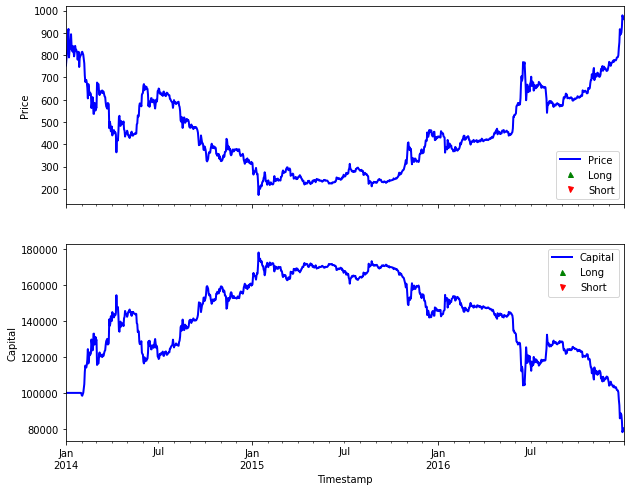

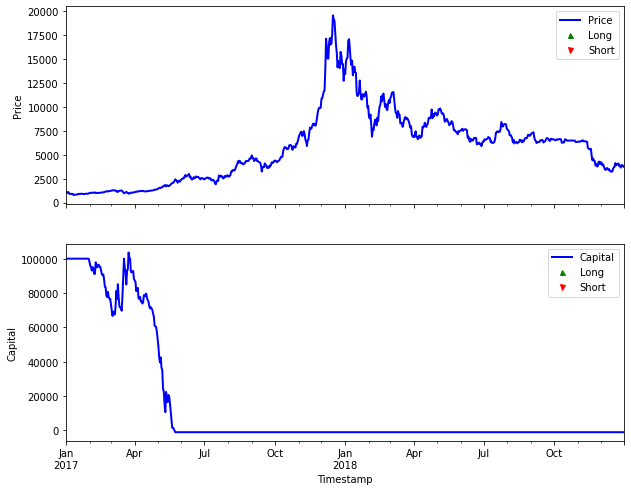

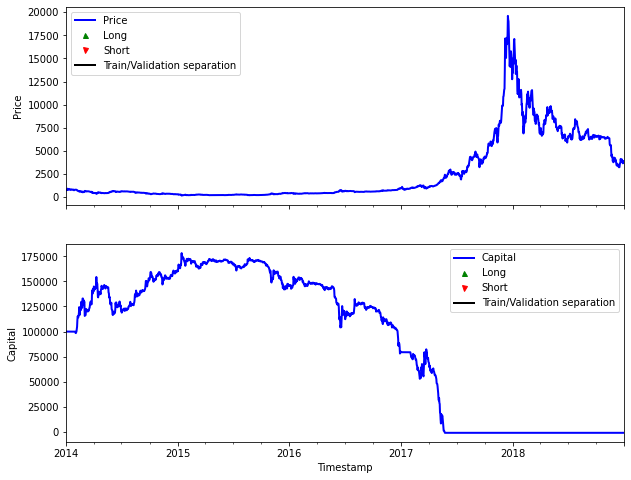

In [8]:
strategy = "Sell and Hold"
cryptocurrency = "Bitcoin"
simulator.trainAndValidate(strategy, cryptocurrency, TRAINING_PARAM)
print()

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   S&H    │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  -99906  │
├───────────────────────────┼──────────┤
│     Annualized Return     │ -100.00% │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │ 140.16%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  -0.828  │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  -0.511  │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │ 100.02%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 848 days │
├───────────────────────────┼──────────┤
│       Profitability       │  0.00%   │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  0.000   │
├───────────────────────────┼──────────┤
│         Skewness          │ -26.796  │
╘═══════════════════════════╧══════════╛
╒═══════════════════════════╤══════════╕
│   Performance 

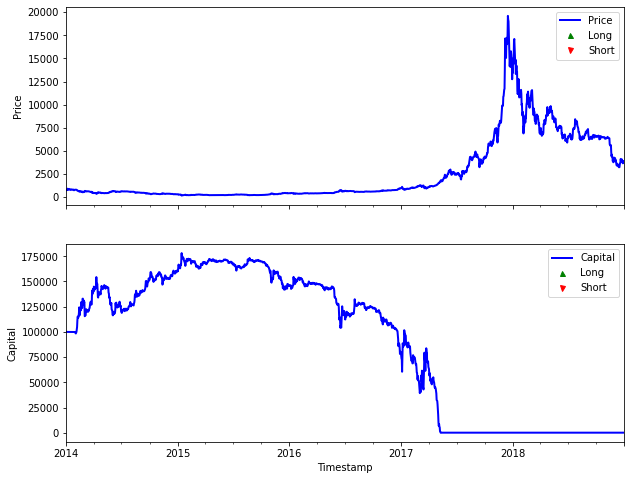

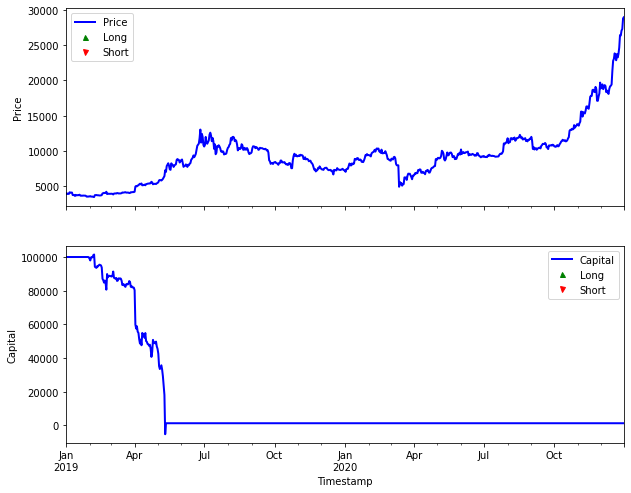

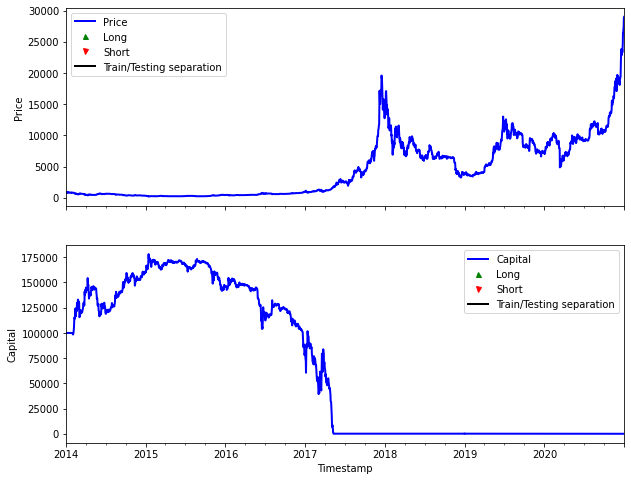

In [9]:
simulator.test(strategy, cryptocurrency, TESTING_PARAM)
print()

╒═══════════════════════════╤═════════╕
│   Performance Indicator   │  MATF   │
╞═══════════════════════════╪═════════╡
│    Profit & Loss (P&L)    │ 775300  │
├───────────────────────────┼─────────┤
│     Annualized Return     │ 53.93%  │
├───────────────────────────┼─────────┤
│   Annualized Volatility   │ 47.01%  │
├───────────────────────────┼─────────┤
│       Sharpe Ratio        │  1.295  │
├───────────────────────────┼─────────┤
│       Sortino Ratio       │  1.847  │
├───────────────────────────┼─────────┤
│     Maximum Drawdown      │ 36.62%  │
├───────────────────────────┼─────────┤
│ Maximum Drawdown Duration │ 21 days │
├───────────────────────────┼─────────┤
│       Profitability       │ 48.28%  │
├───────────────────────────┼─────────┤
│ Ratio Average Profit/Loss │  2.071  │
├───────────────────────────┼─────────┤
│         Skewness          │  0.545  │
╘═══════════════════════════╧═════════╛
╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   MATF   

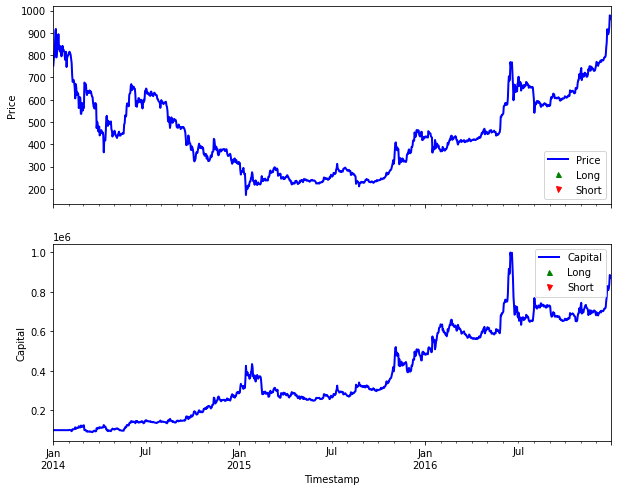

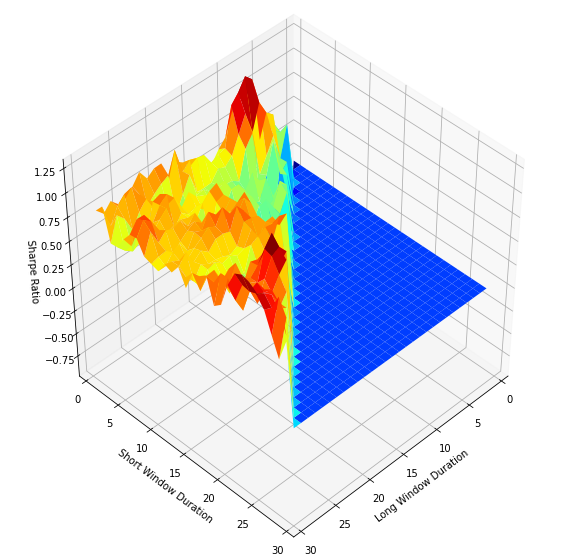

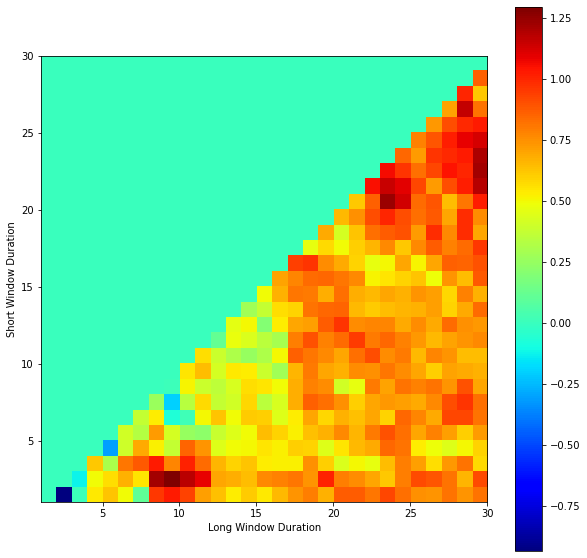

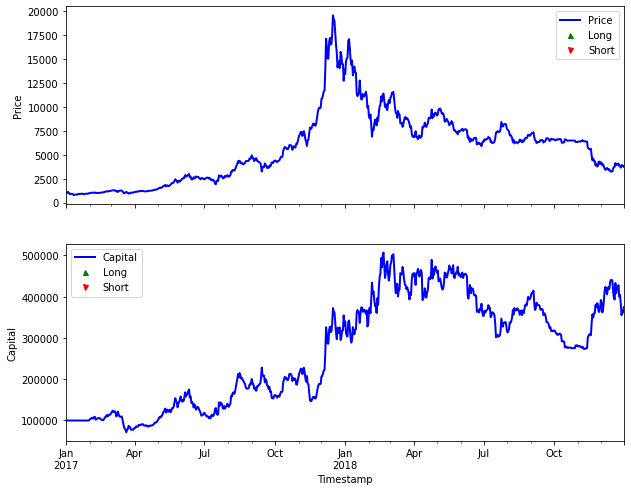

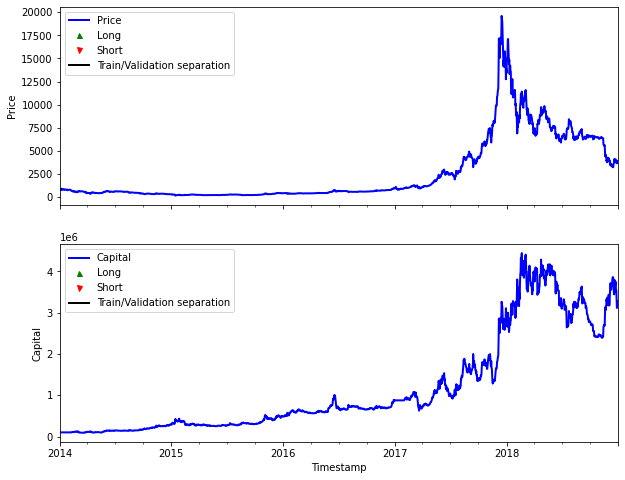

In [10]:
strategy = "Trend Following Moving Averages"
cryptocurrency = "Bitcoin"
simulator.trainAndValidate(strategy, cryptocurrency, TRAINING_PARAM)
print()

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   MATF   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │ 3294777  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  41.56%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  56.85%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  1.137   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  1.643   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  46.54%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 262 days │
├───────────────────────────┼──────────┤
│       Profitability       │  46.19%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  1.649   │
├───────────────────────────┼──────────┤
│         Skewness          │  0.589   │
╘═══════════════════════════╧══════════╛
╒═══════════════════════════╤══════════╕
│   Performance 

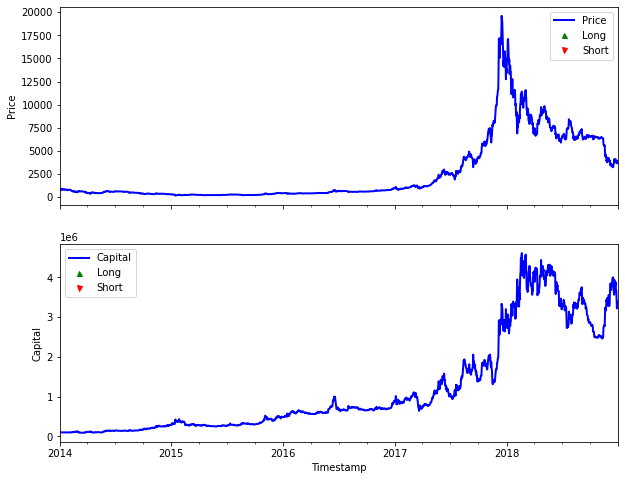

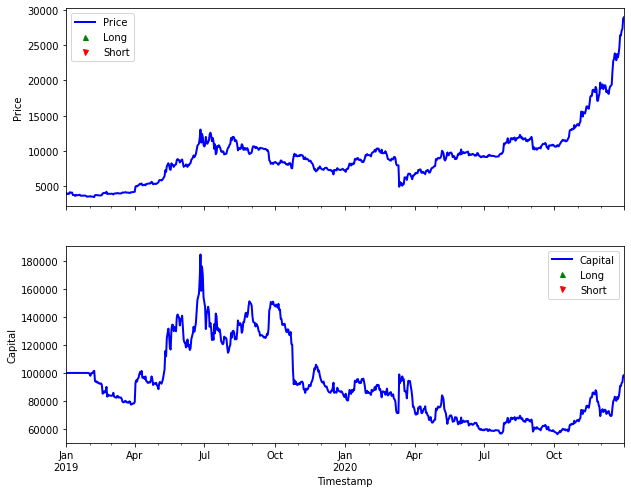

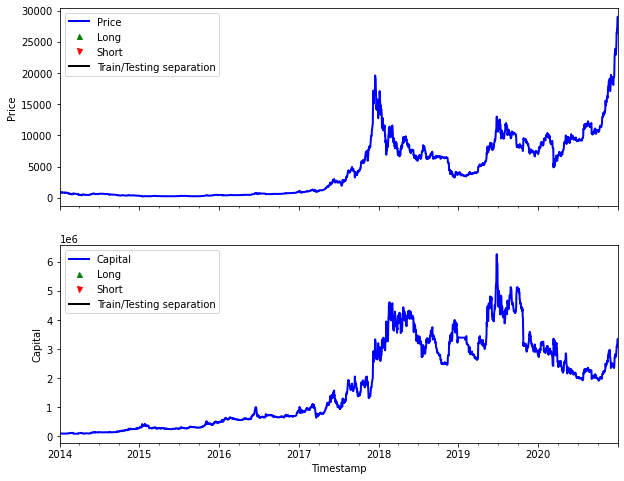

In [11]:
simulator.test(strategy, cryptocurrency, TESTING_PARAM)
print()

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   MAMR   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  -37545  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  4.96%   │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  53.68%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.067   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  0.087   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  78.22%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 587 days │
├───────────────────────────┼──────────┤
│       Profitability       │  49.29%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  0.993   │
├───────────────────────────┼──────────┤
│         Skewness          │  0.217   │
╘═══════════════════════════╧══════════╛
╒═══════════════════════════╤══════════╕
│   Performance 

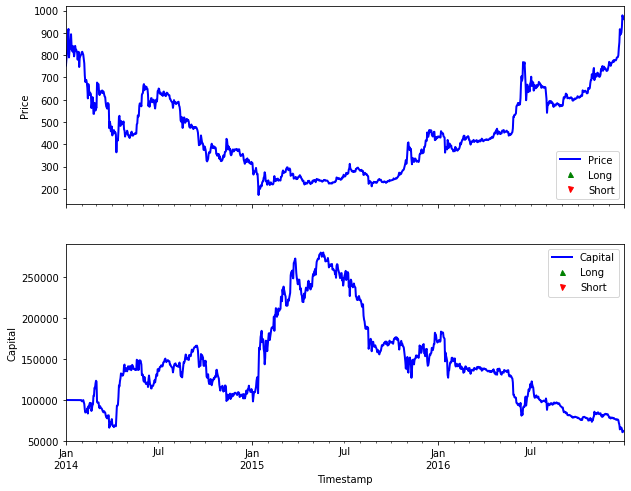

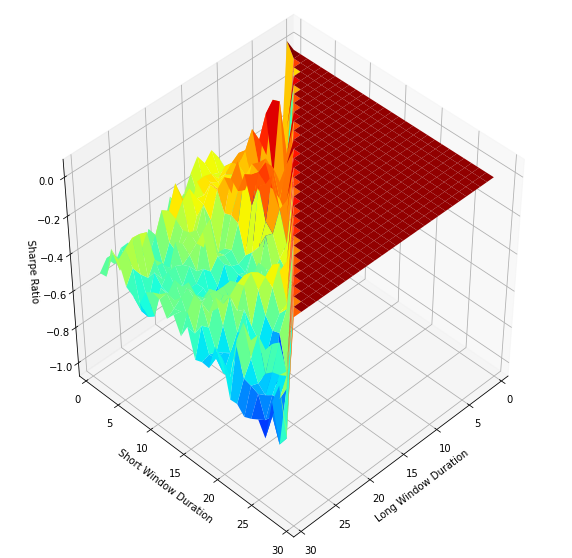

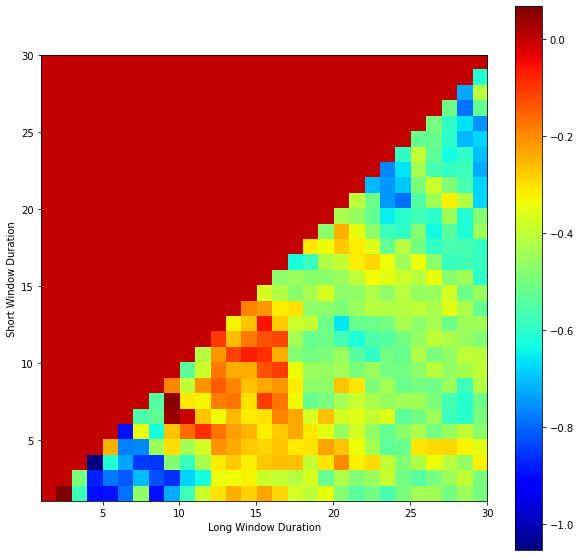

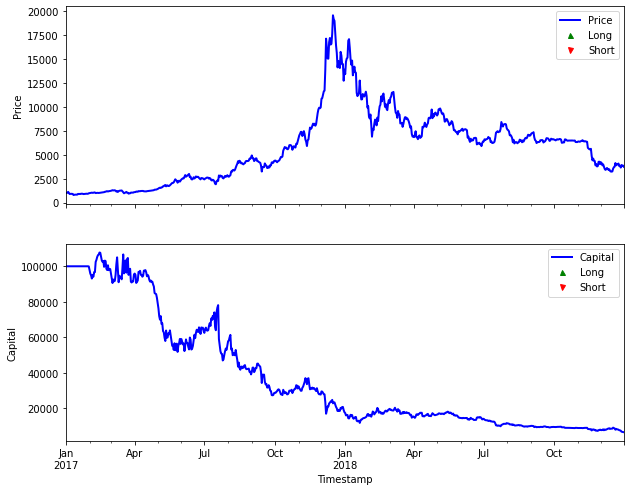

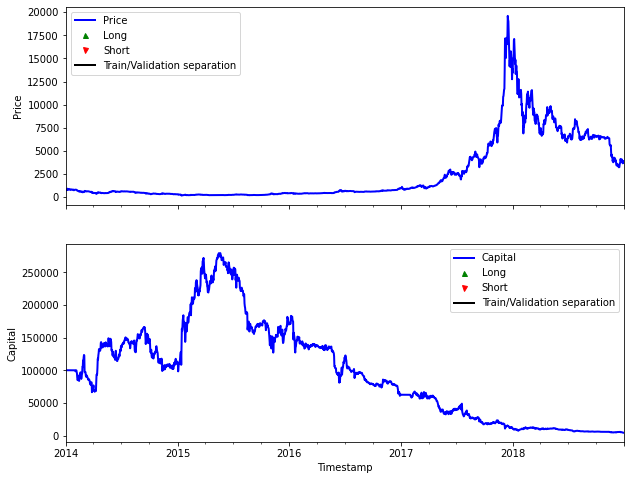

In [12]:
strategy = "Mean Reversion Moving Averages"
cryptocurrency = "Bitcoin"
simulator.trainAndValidate(strategy, cryptocurrency, TRAINING_PARAM)
print()

╒═══════════════════════════╤═══════════╕
│   Performance Indicator   │   MAMR    │
╞═══════════════════════════╪═══════════╡
│    Profit & Loss (P&L)    │  -93347   │
├───────────────────────────┼───────────┤
│     Annualized Return     │ -100.00%  │
├───────────────────────────┼───────────┤
│   Annualized Volatility   │  56.84%   │
├───────────────────────────┼───────────┤
│       Sharpe Ratio        │  -0.370   │
├───────────────────────────┼───────────┤
│       Sortino Ratio       │  -0.466   │
├───────────────────────────┼───────────┤
│     Maximum Drawdown      │  97.62%   │
├───────────────────────────┼───────────┤
│ Maximum Drawdown Duration │ 1320 days │
├───────────────────────────┼───────────┤
│       Profitability       │  51.15%   │
├───────────────────────────┼───────────┤
│ Ratio Average Profit/Loss │   0.885   │
├───────────────────────────┼───────────┤
│         Skewness          │  -0.188   │
╘═══════════════════════════╧═══════════╛
╒═══════════════════════════╤═════

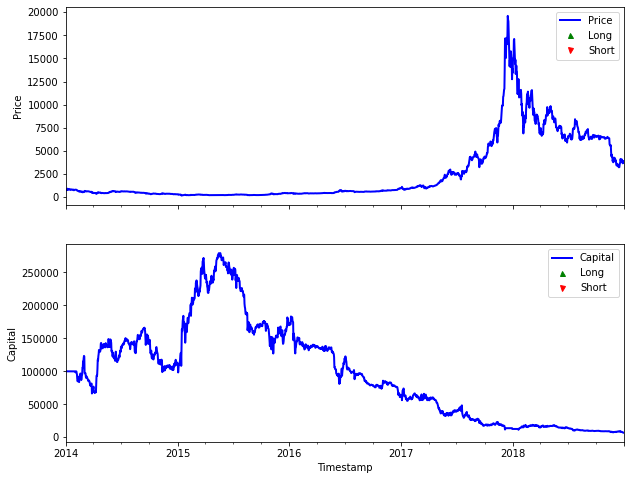

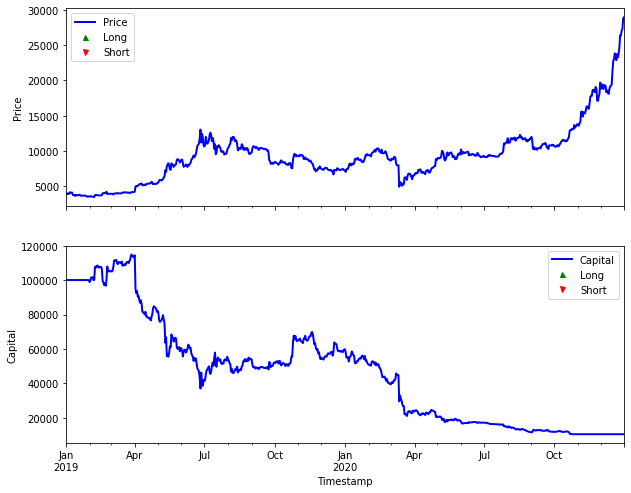

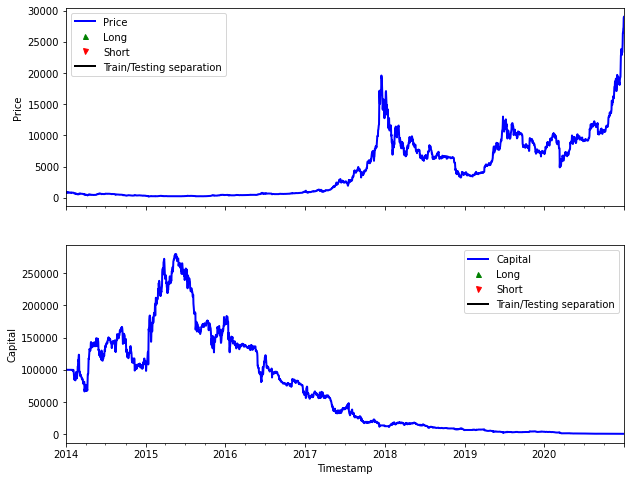

In [13]:
simulator.test(strategy, cryptocurrency, TESTING_PARAM)
print()